In [1]:
# Scientific libraries
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt

#from python_tricks import cmap_intervals
plt.style.use('mike_dark')
from pychangcooper import SynchrotronCooling_ContinuousPLInjection, CoolingAcceleration
#from pychangcooper.synchrotron_emission import SynchrotronEmission

$$\frac{\partial N\left(\gamma, t\right)}{\partial t}  = \frac{\partial }{\partial \gamma} \left[ B \left(\gamma, t \right) + C \left(\gamma, t \right) \frac{\partial N\left(\gamma, t\right)}{\partial \gamma}\right]$$

# Generic Cooling and Acceleration

This demonstrates the a generic heating and cooling solution for 

In [2]:
n_grid_points = 300

init_distribution = np.zeros(n_grid_points)


for i in range(30):
    
    init_distribution[i+1] = 1.



In [3]:
generic_ca = CoolingAcceleration(n_grid_points=n_grid_points,
                                        C0 = 1.,
                                        t_acc= 1E-4,
                                        cooling_index=2.,
                                        acceleration_index=1.,
                                        initial_distribution = init_distribution,
                                        store_progress = True
                                        
                                       
                                       )

/Users/jburgess/.environs/pychangcooper/lib/python3.7/site-packages/pychangcooper-0.2.0-py3.7.egg/pychangcooper/chang_cooper.py:155: RuntimeWarning: overflow encountered in exp


In [4]:
for i in range(50):
    
    generic_ca.solve_time_step()

<IPython.core.display.Javascript object>


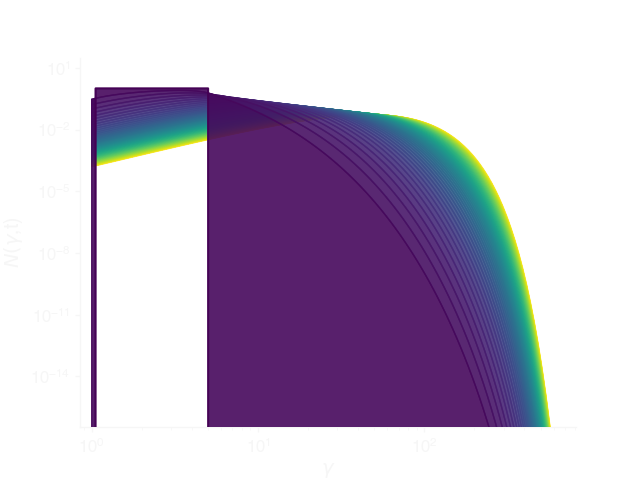

In [6]:
generic_ca.plot_evolution(skip=1,alpha=.9, 
                          #reversed=False,
                          cmap='viridis');

In [8]:
synch_cool = SynchrotronCooling_ContinuousPLInjection(B=1E10,
                                index=-3.5,
                                gamma_injection=1E3,
                                gamma_cool=500,
                                gamma_max=1E5,
                                store_progress=True
                               
                               )

In [9]:
synch_cool.run(photon_energies=np.logspace(1,7,50))

<IPython.core.display.Javascript object>


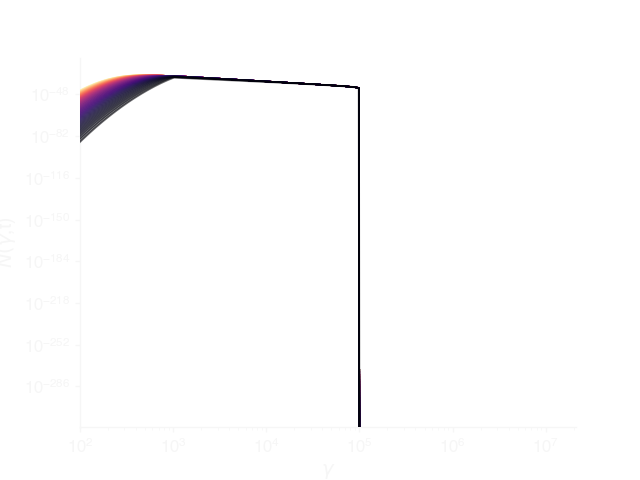

(100, 21159236.852409627)

In [11]:
fig = synch_cool.plot_evolution(skip=2,
                                alpha=.4,
                                cmap='magma',
                               # reversed=True
                               );
ax = fig.get_axes()[0]
ax.set_xlim(100)
#ax.set_ylim(1E-10)

<IPython.core.display.Javascript object>


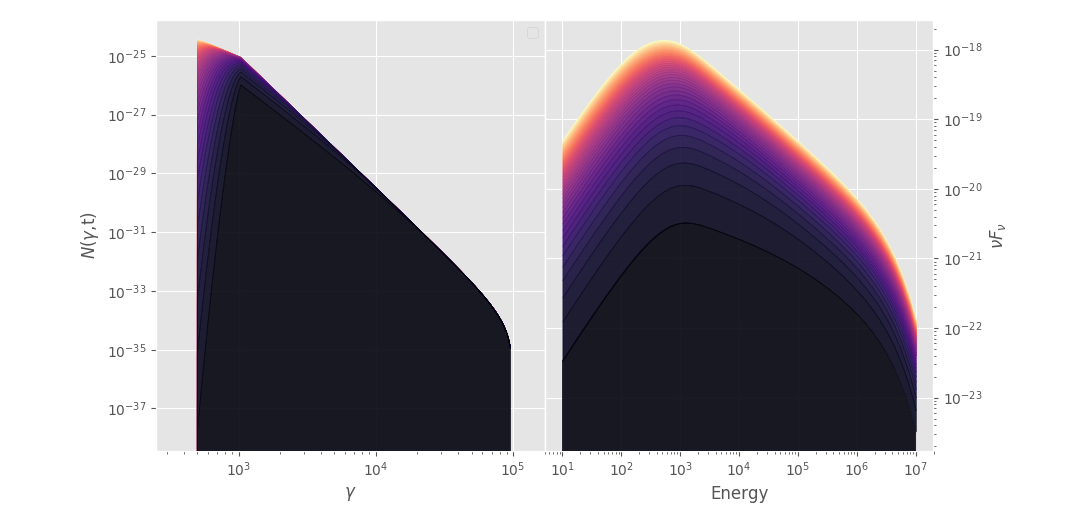

No handles with labels found to put in legend.


In [9]:
synch_cool.plot_photons_and_electrons(skip=5,alpha=.9,cmap='magma');

<IPython.core.display.Javascript object>


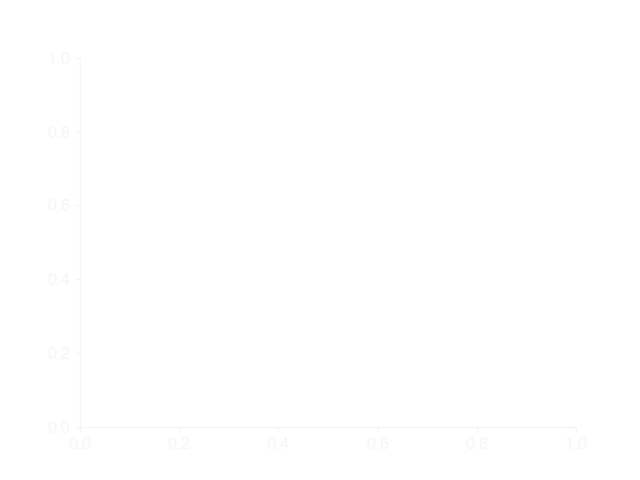

NameError: name 'cmap_intervals' is not defined

In [12]:
fig, ax = plt.subplots()

tot = np.zeros(100)
solution = synch_cool._all_spectra.cumsum(axis=0)[::50]

colors = cmap_intervals(len(solution),cmap='magma')

zorder=len(solution)
for i, spec in enumerate(solution):
    

    
    ax.fill_between(synch_cool._photon_energies, 
            0.,
            synch_cool._photon_energies**2 * spec,
            color=colors[i],
            zorder = zorder,
            alpha=.7
           
           )
    
    zorder -=1
ax.set_xscale('log')
ax.set_yscale('log') 
#ax.loglog(synch_cool._photon_energies, synch_cool._photon_energies**2 * synch_cool._total_spectrum)

In [6]:
fig.subplots_adjust?

In [9]:
se._synchrotron_kernel.shape

(100, 300)

In [7]:
synch_cool._all_spectra.cumsum(axis=0)

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.21288306e-26, 1.81224838e-26, 1.48030602e-26, ...,
        7.85018964e-38, 2.31939484e-38, 5.78623297e-39],
       [6.65789535e-26, 5.45212213e-26, 4.45309137e-26, ...,
        1.72994992e-37, 5.03985350e-38, 1.24159854e-38],
       ...,
       [1.62101354e-20, 1.15815201e-20, 8.12084096e-21, ...,
        9.80005971e-35, 2.79084962e-35, 6.74611523e-36],
       [1.62365867e-20, 1.15993228e-20, 8.13258746e-21, ...,
        9.80989172e-35, 2.79364944e-35, 6.75288279e-36],
       [1.62630414e-20, 1.16171269e-20, 8.14433444e-21, ...,
        9.81972373e-35, 2.79644927e-35, 6.75965035e-36]])